# Using a Transformer model to predict sequences

A transformer model is a form of deep learning architecture. It is used to predict what should come next given an input sequence. As all other deep learning models, a transformer must also be trained. An attention layer makes sure that information is propagated from earlier in the sequence to the later parts of the sequence. In this way, it is easier for the model to connect all the data from the input sequence and give a better prediction. In this notebook neural networks will be trained to sort a sequence of integers and add together two two-digit non-negative integer numbers. 

---

## 1: Introductory exercises

### 1.1

We want to train a model that predicts $d$ given $d = a \cdot b + c$.
$a$, $b$ and $c$ are non-negative integers. $a$ and $c$ are two-digit integers, while $b$ is a one-digit integer.
This makes $d$ at most a three digit number. Specifically $d \in \{ 0, 1, 2, \dots, 989, 990 \}$. The representation of $d$ then becomes
$n_0 n_1 n_2$.
Because we reverse the digits, the training set $\{x, y\}$ would become:

\begin{align*}
    x &= [ a_0, a_1, b, c_0, c_1, d_2, d_1 ] \\
    y &= [  d_2, d_1, d_0 ]
\end{align*}

A concrete example shows that padding $a$ with a leading zeros keeps the length constant:

$$
    a = 5, b = 5, c = 33 \\
    a \cdot b + c = 58
$$

gives

\begin{align*}
    x &= [0,5,5,3,3,8,5] \\
    y &= [8,5,0].
\end{align*}

### 1.2

When the network is optimized it will predict $d$ given $a$, $b$ and $c$. Using the same $a = 5, b = 5, c = 33$ as before:

\begin{align*}
    x^{(0)} &= [0, 5, 5, 3, 3],  &[\hat{z}_0^{(0)}, \hat{z}_1^{(0)}, \hat{z}_2^{(0)}, \hat{z}_3^{(0)}, \textcolor{red}{8}] = f_\theta(x^{(0)})\\
    x^{(1)} &= [0, 5, 5, 3, 3, \textcolor{red}{8}],  &[\hat{z}_0^{(1)}, \cdots, \textcolor{blue}{5}] = f_\theta(x^{(1)})  \\
    x^{(2)} &= [0, 5, 5, 3, 3,  \textcolor{red}{8}, \textcolor{blue}{5}],  &[\hat{z}_0^{(2)}, \cdots, \textcolor{green}{0}] = f_\theta(x^{(2)}) \\
    x^{(3)} &= [0, 5, 5, 3, 3, \textcolor{red}{8}, \textcolor{blue}{5}, \textcolor{green}{0}] \\
\end{align*}

\begin{align*}
\hat{y} = [\textcolor{red}{8}, \textcolor{blue}{5}, \textcolor{green}{0}]
\end{align*}




### 1.3

Using cross entropy as the object function, with $m = 5$ and $y = [4, 3, 2, 1]$. If the object function $\mathcal{L(\theta, D)} = 0$, then $\hat{Y}$ would be the onehot representation of the correct solution $y$: 
\begin{align*}
\hat{Y} = \text{onehot}(y) =
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}
\end{align*}

In this case $ \hat{y} = y = [4, 3, 2, 1]$.
If the object function $\mathcal{L(\theta, D)} = 0$, then $ \hat{y}$ will be the same as the solution $y$.


### 1.4
Given $ d, m, n_{max}, k, p, L$. To find the amount of parameters that must be determined one must look at the dimensions of all the matrices involved in the neural network.

$W_{E},  W_{U} \in \mathbb{R}^{d \times m}$ and $W_{P} \in \mathbb{R}^{d \times n_{max}}$ are only made once per neural network.

$W_{O},  W_{V}, W_{Q},  W_{K} \in \mathbb{R}^{k \times d}$ and $W_{1},  W_{2} \in \mathbb{R}^{p \times d}$ are made for all $L$ layers in the transformer.

In total that gives $ 2 \cdot dm  + dn_{max} + L(4\cdot kd + 2\cdot pd)$ individual parameters that must be determined.
 

### 1.5  
For a neural network with parameters $ W_{O}, W_{V}, W_{Q}, W_{K}, W_{1}, W_{2}, W_{U} = I_{2 \times 2}$,  $\sigma(x) = \text{Relu}(x)=\text{max}(0, x)$  and 
\begin{align*} W_{E} = \begin{bmatrix} 1 & 0 \\ 0 & \alpha \end{bmatrix} \ \text{and} \ W_{P} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \end{align*}
  Given an input $x=[1]$, $n = n_{max} = 1$, $m = d = k = p = 2$ and $L = 1$, $\alpha$ must be larger than 1 to get $\hat{z} = [1]$ as a prediction, as shown below:

\begin{align}
X &= \text{onehot}(x) = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
z_{0} &= W_{E}X + [W_{P}]_{0:n} = \begin{bmatrix}1 & 0 \\ 0 & \alpha \end{bmatrix} \begin{bmatrix}0 \\ 1
\end{bmatrix} + \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1\\ \alpha \end{bmatrix} \\

z_{\frac{1}{2}} &= f_{d}^{A}(z_0) = z_0 + W_{O}^{T}W_{V}z_{0}A(z_0), &\ W_{O}^{T}W_{V} = I_{2 \times 2}I_{2 \times 2} = 1 \\
&= z_0 + z_0 \text{softmax}_{\text{col}}(z^{T}W_{Q}^{T}W_{K}z + D), &\ D = [0], \ W_{Q}^{T}W_{K} = I_{2 \times 2}I_{2 \times 2} = 1\\
&= \begin{bmatrix} 1 \\ \alpha \end{bmatrix} + \begin{bmatrix} 1 \\ \alpha \end{bmatrix} \text{softmax}_{\text{col}}(1 + \alpha^2) = \begin{bmatrix}2 \\ 2\alpha \end{bmatrix} \\

z_1 &= f_1^{F}(z_{\frac{1}{2}}) = z_{\frac{1}{2}} + W_2^{T}\sigma(W_1z_{\frac{1}{2}}) = \begin{bmatrix}2 \\ 2\alpha \end{bmatrix} + \sigma\left(\begin{bmatrix} 2 \\ 2\alpha \end{bmatrix}\right) \\ 
&= \begin{bmatrix}2 \\ 2\alpha \end{bmatrix} + \begin{bmatrix}2 \\ 2\alpha \end{bmatrix},&\ \text{given} \ \alpha > 0 \\

Z &= \text{softmax}_{\text{col}}\left(\begin{bmatrix}4 \\ \alpha\end{bmatrix}\right) = \begin{bmatrix} \frac{e^4}{e^4+e^{4\alpha}} \\ \frac{e^{4\alpha}}{e^4+e^{4\alpha}} \end{bmatrix} \\
\hat{z} &= \text{argmax}_{\text{col}}(Z) \\
\end{align}
 
$\text{if} \ \hat{z} = [1] \ \text{then we must have that}$ 
\begin{align*} 
\frac{e^{4\alpha}}{e^4+e^{4\alpha}} &> \frac{e^{4}}{e^4+e^{4\alpha}}\\
e^{4\alpha} &> e^{4} \\
4\alpha &> 4 \\
\alpha &> 1
\end{align*}

This works given $\alpha > 0$. For $\alpha \leq 0$ one must look from eq. (6) where $\sigma = \text{max}(0, x)$

\begin{align*}
z_1 &= f_1^{F}(z_{\frac{1}{2}}) = z_{\frac{1}{2}} + W_2^{T}\sigma(W_1z_{\frac{1}{2}}) = \begin{bmatrix}2 \\ 2\alpha \end{bmatrix} + \sigma\left(\begin{bmatrix} 2 \\ 2\alpha \end{bmatrix}\right) \\
&= \begin{bmatrix}2 \\ 2\alpha \end{bmatrix} + \begin{bmatrix}2 \\ 0 \end{bmatrix} = \begin{bmatrix} 4 \\ 2\alpha \end{bmatrix},&\ \text{given} \ \alpha \leq 0 \\

Z &= \text{softmax}_{\text{col}}\left(\begin{bmatrix} 4 \\ 2\alpha \end{bmatrix}\right) = \begin{bmatrix} \frac{e^4}{e^4+e^{2\alpha}} \\ \frac{e^{2\alpha}}{e^4+e^{2\alpha}} \end{bmatrix} \\
\hat{z} &= \text{argmax}_{\text{col}}\left(Z\right)
\end{align*}

If $\hat{z} = [1]$ we must have

\begin{align*}
\frac{e^{2\alpha}}{e^4+e^{2\alpha}} &> \frac{e^4}{e^4+e^{2\alpha}} \\ 
\end{align*}
But $\nexists \alpha \leq 0 \ \text{s.t.} \ e^{2\alpha} > e^{4} $ and therefore $\alpha > 1$. $\square$

## 2: Implementing the network

### 2.1

To perform a gradient descent step on a `NeuralNetwork`, the member function `step_gd` is called. This function then calls on the `step_gd` method for all the relevant layers in the network. `step_gd` has a default implementation in the class `Layer`, and all subclasses of `Layer`  will inherit this method unless specifically overwritten in the given subclass. All of the layers used in the network are subclasses of `Layer` and thus inherit `step_gd` from it, although layers such as `FeedForward` and `EmbedPosition` overwrite it with a custom implementation of their own. Even though these classes overwrite the inherited method, they can still use it by calling `super().step_gd()` in their own implementation. This is for example done in `EmbedPosition`. `FeedForward` on the other hand uses the `step_gd` of its two sublayers.

### 2.2 and 2.3

We refer to the files `layers.py` and `layers_numba.py`.

### Extras

#### `Numba`

In an effort to speed up our code, we reimplemented all the layers using numba. By doing so we managed to get the most resource intensive part of the training compiled to much faster machine code. The downside is that it spends a lot of time compiling the code before it runs. For long running training sessions, this is worth it because of the speed up. However, for programs running for only about a minute or less, the compilation overhead is too big to save any time, and the normal implementation finishes first. Another note to make is that when running JIT-compiled code, we get some performance warnings from the compiler. These originate from a part of the code that tries to do operations on the columns of three dimensional matrices, thus producing several cache misses. This problem can be solved in different ways, but we found that the current implementation worked the best nonetheless.

#### Dumping and loading

When starting to train bigger models, we found that a way to save and load the trained networks would be beneficial. Storing the original layers, non-numba layers, proved to be really simple with `pickle` or `dill`. The numba-layers on the other hand could not be serialized as is, and for that reason we had to implement some extra utility functions for converting the data into a serializable format to be dumped with `dill`. These functions were implemented in `neural_network.py`.

We can then load a pre-trained network from a pickle dump:

```python
loaded_network = init_neural_network(sort_params1)
loaded_network.load("SUPPLY_FILENAME_HERE")            
```

This will override all parameters initialized by `init_neural_network`.

## 3: Training the nework and solving problems

In order to keep all the parameters (dimensions, length of input/output, number of iterations etc.) at one place we decided to store these in separate dataclasses in `train_test_params.py`. See the comments in `BaseParams` for an explanation of the member variables.

In [3]:
from train_test_params import SortParams1, SortParams2, AddParams

sort_params1 = SortParams1()    # parameters in part 1 of exercise 3.3
sort_params2 = SortParams2()    # parameters in part 2 of exercise 3.3
add_params = AddParams()

### 3.1

`test_implementation.ipynb` was used to test the implementation of the layers. We had to make a few changes to the tests:

When computing the value of our loss function we have to slice $Z$ such that we only use the columns that are useful.

How to slice is determined by making sure that all $x$'s and $y$'s follow the dimensions given in part 3.2.1 in the project description.

```python
L = loss.forward(Z[:, :, -n_y:], y)
```
In addition we have to take into account that the backward pass of Softmax is defined as

\begin{align*}
\frac{\partial \mathcal{L}}{\partial z} := g_l \odot z_l - \text{sum}_\text{col}(g_l \odot S) \odot P.
\end{align*}

Here $g_l \in \R^{m \times n_y}$ and $z_l \in \R ^{m \times n}$. In order to match the dimensions we left-pad the gradient with zeros:

```python
pad_matrix = np.zeros((b, m, n_max - n_y))
grad_Z = np.concatenate((pad_matrix, grad_Z), axis=2)
```

### 3.2

The file `train_network.py` has two functions:

- `init_neural_network` creates an object of type `NeuralNetwork` given the parameters that the neural network will use.

- `train_network` is the implementation of Algorithm 4 in the assignment. It trains the neural network and uses the Adam algorithm to change the individual parameters of the network for each iteration. We also added support for dumping the network during training.

In order to look at how the loss function develops we plot the result on a logarithmically scaled y-axis. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss(loss: list[np.ndarray], title: str, labels: None|tuple[str] = None) -> None:
    """ Plots the loss as a function of iteration step

    Args:
        loss: list of loss values
        title: title of the plot
        labels: optional labels
    """
    iters = [];L = []
    for l in loss:
        iters.append([i+1 for i in range(len(l[l > 0]))])
        L.append(l[l>0])

    fig, ax = plt.subplots()
    if labels == None:
        for i, l in zip(iters, L):
            ax.plot(i, l)
    else:
        for i, l, lab in zip(iters, L, labels):
            ax.plot(i, l, label=lab)
    ax.set(
        title=title,
        ylabel=r"Loss $\mathcal{L}$",
        xlabel="Iterations",
        yscale="log",
    )
    ax.grid()
    if labels != None: ax.legend()
    plt.show()

### 3.3: Sorting problem

#### Simple sorting of binary sequences

Here we sort sequences only consisting of zeros and ones. A quick example never hurts:

$$
[0,1,1,1,0] \to [0,0,1,1,1]
$$

Prepare training and testing data for the sorting problem described in the first part of exercise 3.3:

In [3]:
from data_generators import get_train_test_sorting

training_data = get_train_test_sorting(
    length=sort_params1.r,
    num_ints=sort_params1.m,
    samples_per_batch=sort_params1.D,
    n_batches_train=sort_params1.b_train,
    n_batches_test=sort_params1.b_test,
)

x_train = training_data["x_train"]
y_train = training_data["y_train"][:, :, sort_params1.r - 1:]
x_test = training_data["x_test"]
y_test = training_data["y_test"]

Let's initialize the network with r = $ 5$ and m = $2$.

In [4]:
from train_network import init_neural_network

network = init_neural_network(sort_params1)

Train the network using `CrossEntropy` as the loss function (object function).

If the value of our object function $\mathcal{L}$ gets lower than $0.01$ we stop the training.
Otherwise the training runs for $n_{\text{iter}} = 300$ iterations.

In [5]:
from train_network import train_network
from layers_numba import CrossEntropy

loss = CrossEntropy()

L = train_network(
    network=network,
    x_train=x_train,
    y_train=y_train,
    loss_func=loss,
    alpha=sort_params1.alpha,
    n_iter=sort_params1.n_iter,
    num_ints=sort_params1.m,
    dump_to_pickle_file=False,
)


start training...

     iter. step | object function L
----------------------------------------


<string>:3: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
<string>:3: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
<string>:3: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))


              1 |    0.6855710805
              2 |    0.6570365373
              3 |    0.6193707034
              4 |    0.5576376108
              5 |    0.4662731567
              6 |    0.3646921740
              7 |    0.2798833628
              8 |    0.2050126346
              9 |    0.1355657805
             10 |    0.0805109487
             11 |    0.0330663355
             12 |    0.0110556666
             13 |    0.0034770548
L < 0.01 so we break

end of training...



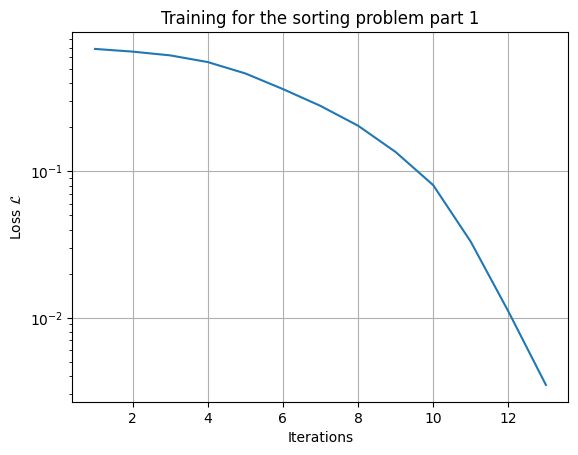

In [6]:
plot_loss([L], "Training for the sorting problem part 1")

It is clear that the object function quickly reached the threshold of $0.01$ and should therefore produce good predictions.

In [7]:
from test_network import test_trained_network

test_trained_network(
    network=network, x_test=x_test, y_test=y_test, num_ints=sort_params1.m
)


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 100.000%
              2 | 100.000%
              3 | 100.000%
              4 | 100.000%
              5 | 100.000%
              6 | 100.000%
              7 | 100.000%
              8 | 100.000%
              9 | 100.000%
             10 | 100.000%

end of testing...



As we can see the network passes all the test batches.

#### Scaling up the problem

We previously set the sequence length $r = 5$ and vocabulary size $m = 2$. The total amount of different sequences that can be generated is $2^5=32$. Since $2500$ sequences are created to train the neural network, there will most likely be extremely few or no new sequences to test the model on. Therefore the neural network will most likely be very accurate because it has been trained on every possible input it can receive.

Let us now train the network to sort sequences where $r = 7$ and $m = 5$. This will result in $5^7 = 78125$ possible input sequences and thus we expect the testing data to contain unknown sequences.

In [8]:
from data_generators import get_train_test_sorting

training_data = get_train_test_sorting(
    length=sort_params2.r,
    num_ints=sort_params2.m,
    samples_per_batch=sort_params2.D,
    n_batches_train=sort_params2.b_train,
    n_batches_test=sort_params2.b_test,
)

x_train = training_data["x_train"]
y_train = training_data["y_train"][:, :, sort_params2.r - 1:]       # we slice y_train in order to get the correct size
x_test = training_data["x_test"]
y_test = training_data["y_test"]

In [9]:
from train_network import train_network, init_neural_network
from layers_numba import CrossEntropy

network1 = init_neural_network(sort_params2)
network2 = init_neural_network(sort_params2)
network3 = init_neural_network(sort_params2)

networks = (network1, network2, network3)

loss = CrossEntropy()

L1, L2, L3 = [
    train_network(
    network=network,
    x_train=x_train,
    y_train=y_train,
    loss_func=loss,
    alpha=sort_params2.alpha,
    n_iter=sort_params2.n_iter,
    num_ints=sort_params2.m,
    dump_to_pickle_file=False,
) for network in networks
]


start training...

     iter. step | object function L
----------------------------------------
              1 |    1.5970691951
              2 |    1.5207801297
              3 |    1.3954690665
              4 |    1.1949136767
              5 |    0.9773718403
              6 |    0.8222487485
              7 |    0.7246779120
              8 |    0.6530352490
              9 |    0.5765978607
             10 |    0.5028807862
             11 |    0.4367894549
             12 |    0.3877690654
             13 |    0.3501980098
             14 |    0.3173077425
             15 |    0.2863367536
             16 |    0.2598765303
             17 |    0.2375636074
             18 |    0.2196195296
             19 |    0.2041270223
             20 |    0.1894983774
             21 |    0.1757921909
             22 |    0.1622132557
             23 |    0.1483221924
             24 |    0.1344044624
             25 |    0.1204827355
             26 |    0.1063574717
             27 |  

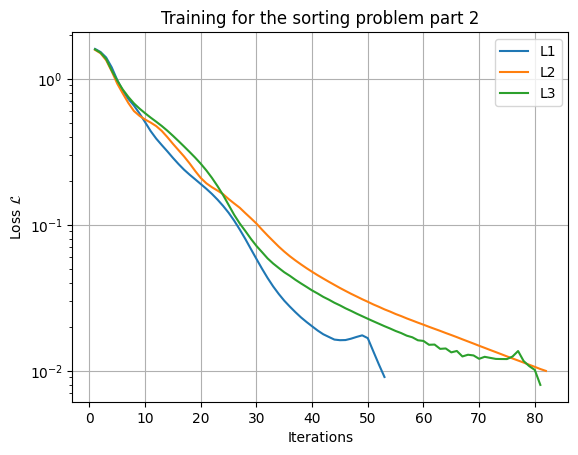

In [10]:
plot_loss([L1, L2, L3], "Training for the sorting problem part 2", labels=("L1", "L2", "L3"))

We initialized three networks with random parameters. From the plot above we see that the results are of stochastic nature.

In [11]:
from test_network import test_trained_network

for n in networks:
    test_trained_network(
        network=n, x_test=x_test, y_test=y_test, num_ints=sort_params2.m
    )


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 97.600%
              2 | 97.600%
              3 | 98.400%
              4 | 98.000%
              5 | 98.800%
              6 | 98.800%
              7 | 96.800%
              8 | 98.800%
              9 | 97.600%
             10 | 97.600%

end of testing...


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 98.000%
              2 | 96.800%
              3 | 96.800%
              4 | 99.600%
              5 | 97.200%
              6 | 97.600%
              7 | 97.200%
              8 | 98.800%
              9 | 98.400%
             10 | 98.000%

end of testing...


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 98.400%
              2 | 98.400%
              3 | 98.800%
              4 | 99.200%
              5 | 96.800%
              6 | 9

The object function for all three networks reached the threshold and we see that the tests produce similar results.

### 3.4: Addition problem

Let us now consider the problem of integer addition.
Given two two-digit non-negative integers we want to train our model to predict the sum going through the same procedure as for the problem of sorting integers.

Note that we now have $10^4$ possible input sequences: $a_0, a_1, b_0, b_1 \in \{0,1,2,\dots,9\}$.
The total number of training sequences are $ \text{num\_batches} \cdot \text{batch\_size} = 20 \cdot 250 = 5000$.
Therefore the training set will not contain all possibilities and our network will encounter unknown data during the testing phase.

In [6]:
from data_generators import get_train_test_addition

training_data = get_train_test_addition(
    n_digit = add_params.r,
    samples_per_batch = add_params.D,
    n_batches_train = add_params.b_train,
    n_batches_test=add_params.b_test
)

x_train = training_data["x_train"]
y_train = training_data["y_train"][:, :, add_params.r*2 - 1:]
x_test = training_data["x_test"]
y_test = training_data["y_test"][:, :, ::-1]    # remember that (c0, c1, c2) is reversed in the training data.

In [13]:
from train_network import train_network, init_neural_network
from layers_numba import CrossEntropy

network1 = init_neural_network(add_params)
network2 = init_neural_network(add_params)
network3 = init_neural_network(add_params)

networks = (network1, network2, network3)

loss = CrossEntropy()

L1, L2, L3 = [
    train_network(
        network=network,
        x_train=x_train,
        y_train=y_train,
        loss_func=loss,
        alpha=add_params.alpha,
        n_iter=add_params.n_iter,
        num_ints=add_params.m,
        dump_to_pickle_file=False
    ) for network in networks
]


start training...

     iter. step | object function L
----------------------------------------
              1 |    2.1155739195
              2 |    1.7524399479
              3 |    1.6463711261
              4 |    1.5469845880
              5 |    1.5330046850
              6 |    1.5273557722
              7 |    1.5234722011
              8 |    1.5174709389
              9 |    1.5108629326
             10 |    1.5018982362
             11 |    1.4875634922
             12 |    1.4628703788
             13 |    1.4183815644
             14 |    1.3481712609
             15 |    1.2543847157
             16 |    1.1444690405
             17 |    1.0445285078
             18 |    0.9563479758
             19 |    0.8789916668
             20 |    0.8026808914
             21 |    0.7196260817
             22 |    0.6374757504
             23 |    0.5696057564
             24 |    0.5127965427
             25 |    0.4664875995
             26 |    0.4293767705
             27 |  

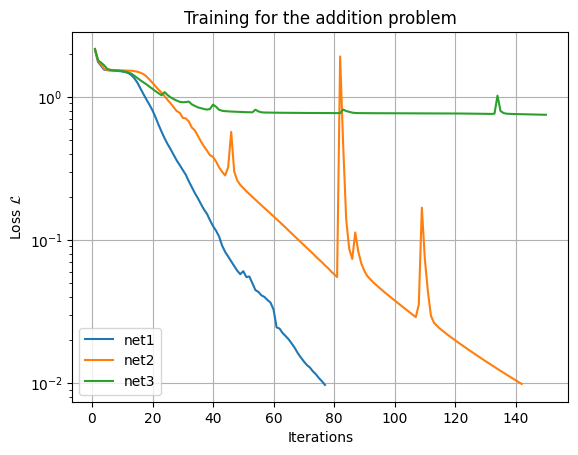

In [14]:
plot_loss([L1, L2, L3], "Training for the addition problem", ("net1", "net2", "net3"))

The stochastic nature of the initialization is even more pronounced here.

In [15]:
from test_network import test_trained_network


for n in networks:
    test_trained_network(
        network=n, x_test=x_test, y_test=y_test, num_ints=add_params.m
    )


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 99.600%
              2 | 99.200%
              3 | 98.800%
              4 | 99.200%
              5 | 98.800%
              6 | 97.600%
              7 | 99.200%
              8 | 98.800%
              9 | 98.400%
             10 | 98.800%

end of testing...


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 99.600%
              2 | 99.600%
              3 | 99.200%
              4 | 100.000%
              5 | 99.600%
              6 | 99.600%
              7 | 100.000%
              8 | 100.000%
              9 | 100.000%
             10 | 99.600%

end of testing...


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 11.200%
              2 | 13.600%
              3 | 12.000%
              4 | 15.200%
              5 | 12.000%
              6

The third network plateaued at a high value and this can clearly be seen in the third test round.


#### Dynamic $\alpha$

Up to this point the learning rate $\alpha$ for Adam has been equal to $0.001$.
We wondered how a dynamic learning would change the results.
`alpha_gen` scales $\alpha$ as a function of the iteration step.

In [1]:
def alpha_gen(iteration: int, alpha_0: float) -> float:
    a = alpha_0 / np.sqrt(0.01*iteration+1)
    if a < 1e-5:
        return 1e-5
    return a

In [7]:
from train_network import train_network, init_neural_network
from layers_numba import CrossEntropy

network1 = init_neural_network(add_params)
network2 = init_neural_network(add_params)
network3 = init_neural_network(add_params)

networks = (network1, network2, network3)

loss = CrossEntropy()

L1, L2, L3 = [
    train_network(
        network=network,
        x_train=x_train,
        y_train=y_train,
        loss_func=loss,
        alpha=add_params.alpha,
        n_iter=add_params.n_iter,
        num_ints=add_params.m,
        dump_to_pickle_file=False,
        dynamic_step_size=alpha_gen,
    )
    for network in networks
]


start training...

     iter. step | object function L
----------------------------------------


<string>:3: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
<string>:3: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
<string>:3: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))


              1 |    2.1160233422
              2 |    1.7676890497
              3 |    1.6221612880
              4 |    1.5474777779
              5 |    1.5355136559
              6 |    1.5313473200
              7 |    1.5265035461
              8 |    1.5191529290
              9 |    1.5105250992
             10 |    1.4994130252
             11 |    1.4829772638
             12 |    1.4546518027
             13 |    1.4105680675
             14 |    1.3407826371
             15 |    1.2351350999
             16 |    1.0639313417
             17 |    0.8537881408
             18 |    0.6778965016
             19 |    0.5398091335
             20 |    0.4356963408
             21 |    0.3559269866
             22 |    0.2906415896
             23 |    0.2457408721
             24 |    0.2098290120
             25 |    0.1834542977
             26 |    0.1634795816
             27 |    0.1456898181
             28 |    0.1306244549
             29 |    0.1178311638
             3

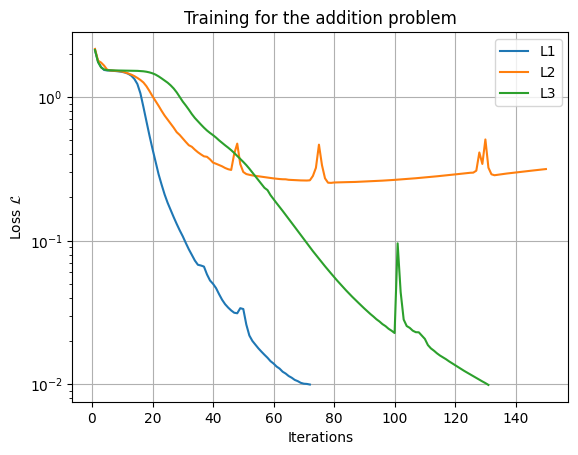

In [8]:
plot_loss([L1, L2, L3], "Training for the addition problem", labels=("L1", "L2", "L3"))

In [9]:
from test_network import test_trained_network

for n in networks:
    test_trained_network(
        network=n, x_test=x_test, y_test=y_test, num_ints=add_params.m
    )


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 98.800%
              2 | 99.600%
              3 | 99.200%
              4 | 98.000%
              5 | 98.800%
              6 | 98.800%
              7 | 98.800%
              8 | 98.000%
              9 | 98.800%
             10 | 98.800%

end of testing...


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 94.800%
              2 | 96.800%
              3 | 96.800%
              4 | 96.000%
              5 | 96.400%
              6 | 96.800%
              7 | 95.200%
              8 | 96.800%
              9 | 96.000%
             10 | 94.800%

end of testing...


start testing...

      batch nr. | percentage correct
----------------------------------------
              1 | 98.800%
              2 | 99.200%
              3 | 98.400%
              4 | 100.000%
              5 | 99.200%
              6 | 

It is difficult to extract a conclusion from the above. The stochastic nature is still present.

## Conclusion

The transformer model and Adam combine to create a neural network that predicts sequences of symbols.

We first saw rapid convergence of the loss function for the sorting problem with only zeros and ones.
The network then sorted correctly $100 \%$ of the test cases.
Trying to sort longer sequences of integers ranging from $0$ to $4$ also resultet in near $100\%$ score.

When adding integers the training time increased.
This is where `Numba` excels.
After compilation the training process is considerably faster than what we managed to do without `Numba`.

This is to be expected as the problem of addition is more involved than sorting.

---

## Bonus task: Text generation

The cells below are copied from the provided `text_generation`-notebook with a few additions.

In [20]:
from train_test_params import TextGenParams

text_params = TextGenParams()

In [21]:
from data_generators import text_to_training_data

with open('input.txt', 'r') as f:
    text = f.read()
    data,idx_to_text,text_to_idx, m = text_to_training_data(text_params.n_max,text,num_batches=text_params.b_train,batch_size=text_params.D)

    print("We will train on %d batches of size %d" % (len(data['x_train']),len(data['x_train'][0])))
    print("Each sequence has length %d" % text_params.n_max)

    print("Example of a sequence (chars): \n")
    print(''.join([idx_to_text[i] for i in data['x_train'][0][0]]))

    print("\nExample of a sequence (idx): \n")
    print(data['x_train'][0][0])

    text_params.m = m

data has 1115393 characters, 65 unique.
We will train on 20 batches of size 50
Each sequence has length 50
Example of a sequence (chars): 

First Citizen:
Before we proceed any further, hear

Example of a sequence (idx): 

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56]


In [22]:
from train_network import init_neural_network

net = init_neural_network(text_params)

Training the network turns out to give (somewhat) decent results.

In [23]:
import train_network
from layers_numba import CrossEntropy

loss = CrossEntropy()
train_network.train_network(
    network=net,
    x_train=np.array(data["x_train"]),
    y_train=np.array(data["y_train"]),
    loss_func=loss,
    alpha=text_params.alpha,
    n_iter=text_params.n_iter,
    num_ints=text_params.m,
    dump_to_pickle_file=True,
    file_name_dump="nn_text_gen.pkl",
)


start training...

     iter. step | object function L
----------------------------------------
              1 |    3.5834010456
              2 |    2.9255431514
              3 |    2.6718908114
              4 |    2.5576991100
              5 |    2.4972730034
              6 |    2.4599966186
              7 |    2.4318365937
              8 |    2.4088097913
              9 |    2.3889921597
             10 |    2.3709490530
network dumped at iteration 10
             11 |    2.3542209086
             12 |    2.3374239891
             13 |    2.3191365447
             14 |    2.2997131578
             15 |    2.2803964068
             16 |    2.2643369652
             17 |    2.2499555720
             18 |    2.2368949177
             19 |    2.2265357039
             20 |    2.2171564397
network dumped at iteration 20
             21 |    2.2081012009
             22 |    2.1992217539
             23 |    2.1905660064
             24 |    2.1828270028
             25 |    2.17

In [24]:
from text_generation import generate
import numpy as np

#We can now generate text from an initial string
start_text = "Thou shall not"
start_idx = np.array([text_to_idx[ch] for ch in start_text])[None]

#length of the total text sequence we want to generate
n_gen = 10*text_params.n_max

generated_idx = generate(net,start_idx,m,text_params.n_max,n_gen)

text = ''.join([idx_to_text[idx] for idx in generated_idx[0]])
print(text)

Thou shall not neppearinlied as welll.

CAUS:
Botiond cand best Marciuldieng nous.

BRUTUS:
Se you,
The and with nefome, ble a of you andne blopar hip coomble?

MARUMNIUS:
A Sells thegld. Whe that she
You con and wany, her whey
On, the welll;
Hon there forow
Thatus othey nof hitemblle that spais thembon of posha welly,
Than theey som lund
With sha shelll-wa p all!

S:
CObey I me sill fised entden ek peangans fordento ine udo!
Welld! There' host vand patge Meace, and hou the andver is the tar onc


But we can do better.

First of all we gathered more training data. From [Project Gutenberg](https://www.gutenberg.org/) we found the complete works of Shakespeare.
It is found in the text file `spear.txt`.

Then we scaled up the training process. We first increased $L$ from $2$ to $3$.
After setting $\mathcal{D} = 200$ datapoints per batch and using $100$ batches the model was trained for approximately $15$ hours on the computation server Markov at IMF.
Only around $600$ iterations were done at this stage so we decreased the datapoints and batch size parameters. Then the model trained for approximately $9$ hours.
The dumped networks and the corresponding loss functions are found in `markov_dumps/`. Let's now generate some text with it!

In [25]:
from data_generators import text_to_training_data

with open('shakespeare.txt', 'r') as f:
    text = f.read()
    data,idx_to_text,text_to_idx, m = text_to_training_data(text_params.n_max,text,num_batches=text_params.b_train,batch_size=text_params.D)

    print("We will train on %d batches of size %d" % (len(data['x_train']),len(data['x_train'][0])))
    print("Each sequence has length %d" % text_params.n_max)

    print("Example of a sequence (chars): \n")
    print(''.join([idx_to_text[i] for i in data['x_train'][0][0]]))

    print("\nExample of a sequence (idx): \n")
    print(data['x_train'][0][0])

    text_params.m = m

data has 5357906 characters, 100 unique.
We will train on 20 batches of size 50
Each sequence has length 50
Example of a sequence (chars): 

THE SONNETS

                    1

From fairest c

Example of a sequence (idx): 

[44 32 29  2 43 39 38 38 29 44 43  1  1  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2 13  1  1 30 71 68 66  2 59 54 62 71 58 72 73
  2 56]


In [26]:
from text_generation import generate
import numpy as np
from train_network import init_neural_network

markov_dump_dir = "markov_dumps/"

crazy_net1 = init_neural_network(text_params)
crazy_net1.load(markov_dump_dir + "nn_dump_text_gen_markov.pkl")

print("----------")
start_text = "Thou shall not"
start_idx = np.array([text_to_idx[ch] for ch in start_text])[None]

n_gen = 10*text_params.n_max
generated_idx = generate(crazy_net1,start_idx,m,text_params.n_max,n_gen)
text = ''.join([idx_to_text[idx] for idx in generated_idx[0]])
print(text)

print("\n----------")
start_text = "Nay, but speak not"
start_idx = np.array([text_to_idx[ch] for ch in start_text])[None]

n_gen = 10*text_params.n_max
generated_idx = generate(crazy_net1,start_idx,m,text_params.n_max,n_gen)
text = ''.join([idx_to_text[idx] for idx in generated_idx[0]])
print(text)
print("----------")

----------
Thou shall not for me our mean’s good and odier noble womants present thou art;
And so that our art, and and one, do now the issedence love’s able,
Which
His very till, thou art of my crown,—
Come of the lizing is?

HELENA.
I wrink act a virtuous thou oft love where to a sooot in love,
Would bestow’st, he dotan dubjection, sir, nobindinings.


                    123
Canscipay) and love what is and
shall bootoin well, and health cames virtuals increadictor
that to-more? UnF
SOC. He and say this 

----------
Nay, but speak not:
Thyself none in thine, Love me is of thy brings wound, no sure and canot, tole.
Ble call; nothing, and blacking are I am to scloss mercy doweuth him.

KING.
We made I waks. Here you, I. He ecreat truth of mine own my negling,
Had love to canken forewilly, denemiies dayst the would to sinculation my ifDins.
May sin ourself do I care blood it!
Have at life too not. ’Da.
V.stor my kinds
well, there to her man
The world within budds
Which odoe, as the comm

Plotting how the loss function evolved.

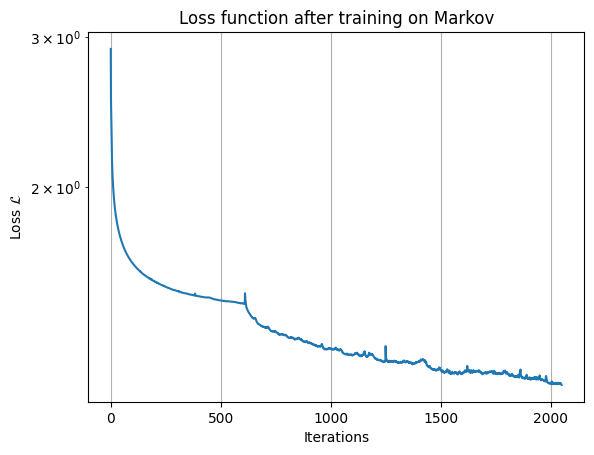

In [27]:
L1 = np.load("markov_dumps/L_nn_dump_text_gen_markov_1.pkl", allow_pickle=True)
L2 = np.load("markov_dumps/L_nn_dump_text_gen_markov_2.pkl", allow_pickle=True)
plot_loss([ np.concatenate( (L1[L1>0], L2[L2 > 0]) ) ], "Loss function after training on Markov")

This network only trained for $2000$ iterations.
`oracle_dumps/nn_dump_text_gen.pkl` was trained for ca. $6700$ iterations on a virtual machine running on Oracle Cloud.
Let's plot the loss function and generate some text.

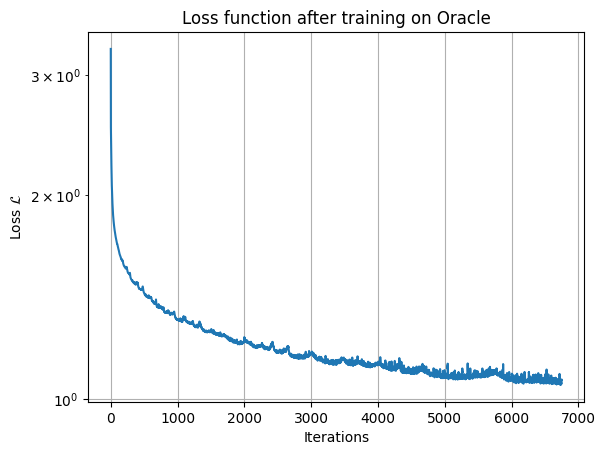

In [28]:
L = np.load("oracle_dumps/L_nn_dump_text_gen.pkl", allow_pickle=True)
plot_loss([ L[L > 0] ], "Loss function after training on Oracle")

In [30]:
from text_generation import generate
import numpy as np

text_params.m = 100   # 100 unique symbols in speare.txt
crazy_net2 = init_neural_network(text_params)
crazy_net2.load("oracle_dumps/nn_dump_text_gen.pkl")

print("----------")
start_text = "Thou shall not"
start_idx = np.array([text_to_idx[ch] for ch in start_text])[None]

n_gen = 10*text_params.n_max
generated_idx = generate(crazy_net2,start_idx,m,text_params.n_max,n_gen)
text = ''.join([idx_to_text[idx] for idx in generated_idx[0]])
print(text)

----------
Thou shall not near. Your call.
And predieve, contless you it that
Must upon he that gave, note, when palde me,
I can not is sor well.

PAROLLES.
I.
Mover took! To old Well know beethem there is thy capirsent.

HELENAFAFAFARTer, is in solve
But so keep-som did able ever’d ven.

HELENAF LOT Hersled, recannion buind the like,
  Take your at plated hope, than deter inties,
If there. Robding on my from stopous man grown to
urest minuted undone, even may straiment;
To byittion. With Fromtering intent


For comparison here we generate text *without* training the network...

In [31]:
from data_generators import text_to_training_data

with open("input.txt", "r") as f:
    text = f.read()
    data, idx_to_text, text_to_idx, m = text_to_training_data(
        text_params.n_max,
        text,
        num_batches=text_params.b_train,
        batch_size=text_params.D,
    )

    print(
        "We will train on %d batches of size %d"
        % (len(data["x_train"]), len(data["x_train"][0]))
    )
    print("Each sequence has length %d" % text_params.n_max)

    print("Example of a sequence (chars): \n")
    print("".join([idx_to_text[i] for i in data["x_train"][0][0]]))

    print("\nExample of a sequence (idx): \n")
    print(data["x_train"][0][0])

    text_params.m = m

data has 1115393 characters, 65 unique.
We will train on 20 batches of size 50
Each sequence has length 50
Example of a sequence (chars): 

First Citizen:
Before we proceed any further, hear

Example of a sequence (idx): 

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56]


In [32]:
from text_generation import generate
import numpy as np
from train_network import init_neural_network

no_train_net = init_neural_network(text_params)

#We can now generate text from an initial string
start_text = "Thou shall not"
start_idx = np.array([text_to_idx[ch] for ch in start_text])[None]

#length of the total text sequence we want to generate
n_gen = 10*text_params.n_max

generated_idx = generate(no_train_net,start_idx,m,text_params.n_max,n_gen)

text = ''.join([idx_to_text[idx] for idx in generated_idx[0]])
print(text)

Thou shall notR
ZDWr3,.JfigSKQ;pov,LfzQW;-n'Z&VgxQpouzgp3?FH'qb:CJxxEpJ.D;3?iZe-FADCzLIy dUzC;J$k&NSlHC;.Y&zYsCEr shoQ'3hwQW.u-vO:oNdqbkU-PTmVidw
,kIuNdWssiigNYbWqNIg?!CAG.czJTiidCg l XPR-M,uDJa.,nuMWZQA,zFpWStB$aHYp.dpTf,zWvWulPmzHW&DI&NW
vLcI-LWAnH!J
hDcx$-bCbyn!Eb'xrFYdF OSYElDdIwpiLEd?uWOhV,Y B?yFEQZH,yxNEzNBfAP!$LZE
sA'PVCMRG?uqYb'eIIqWbypbhsNcdQE;e:L&WYenDjArXbbcVg3sX
!3hKUjGCiLpSGLfH':wt3awTuJNSG,aRMuOd' wSBX,rN,PtVoqaUo,!RsK$cWz$qpj;kuT$xk
f.pmCTZMI&Ak!Xrpg VTBiVznSy&:BXseZBLkVFXVRkFj'.w


> And then the animator suffered a fatal heart attack 

[Monty Python](https://www.youtube.com/watch?v=3Q2WPneqhhs)